# 2 of 6 | Mutual Information

Identifica las características con mayor potencial.


## Introducción

Encontrarse por primera vez con un nuevo conjunto de datos a veces puede resultar abrumador. Puede que te enfrentes a cientos o miles de características sin siquiera contar con una descripción que te oriente. ¿Por dónde empezar?

Un excelente primer paso es construir un **ranking** utilizando una métrica de **utilidad de características**, es decir, una función que mida la asociación entre una característica y el objetivo (*target*). De este modo, puedes seleccionar inicialmente un subconjunto más pequeño de las características más útiles y tener mayor confianza en que tu tiempo estará bien invertido.

La métrica que utilizaremos se llama **información mutua** (*mutual information*). La información mutua es similar a la correlación en el sentido de que mide la relación entre dos variables. La ventaja de la información mutua es que puede detectar **cualquier tipo de relación**, mientras que la correlación solo detecta relaciones lineales.

La información mutua es una excelente métrica de uso general y resulta especialmente útil al comienzo del desarrollo de características, cuando todavía no sabes qué modelo querrás utilizar. Es:

- fácil de usar e interpretar,
- computacionalmente eficiente,
- teóricamente bien fundamentada,
- resistente al sobreajuste (*overfitting*), y
- capaz de detectar cualquier tipo de relación.


## Información mutua y qué mide

La **información mutua** describe las relaciones en términos de **incertidumbre**. La información mutua (MI) entre dos variables es una medida del grado en que el conocimiento de una de ellas reduce la incertidumbre sobre la otra. Si conocieras el valor de una característica, ¿cuánto más seguro estarías respecto al valor del objetivo (*target*)?




## Interpretación de las puntuaciones de información mutua

El valor mínimo posible de la información mutua entre dos variables es **0.0**. Cuando la MI es cero, las variables son **independientes**: ninguna puede aportar información sobre la otra. Por el contrario, en teoría no existe un límite superior para el valor que puede tomar la MI. En la práctica, sin embargo, los valores superiores a **2.0** aproximadamente son poco comunes. (La información mutua es una cantidad **logarítmica**, por lo que aumenta muy lentamente).




### Aspectos a tener en cuenta al aplicar la información mutua

Aquí tienes algunas cosas que conviene recordar al utilizar la información mutua:

- La MI puede ayudarte a comprender el **potencial relativo** de una característica como predictor del objetivo, considerada de forma individual.
- Es posible que una característica sea muy informativa cuando interactúa con otras, pero no tanto por sí sola. La MI **no puede detectar interacciones entre características**, ya que es una métrica **univariada**.
- La utilidad real de una característica depende del **modelo** con el que se utilice. Una característica solo es útil en la medida en que su relación con el objetivo sea algo que el modelo pueda aprender. El hecho de que una característica tenga una puntuación alta de MI no significa que tu modelo vaya a poder aprovechar esa información. Puede que necesites **transformar la característica** primero para exponer la asociación.


---

<p align="center">
  <img src="assets/separador.png" alt="Separador" width=1000"/>
</p>

---

## Ejemplo – Automóviles de 1985

El conjunto de datos **Automobile** consta de 193 coches del año modelo 1985. El objetivo de este conjunto de datos es predecir el **precio** de un automóvil (el *target*) a partir de 23 características del vehículo, como la **marca**, el **tipo de carrocería** (*body_style*) y la **potencia** (*horsepower*).  

En este ejemplo, clasificaremos las características utilizando **información mutua** e investigaremos los resultados mediante **visualización de datos**.




In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
plt.style.use=("seaborn-whitegrid")

df=pd.read_csv("data/autos.csv")


In [5]:
df.head(2)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500


El algoritmo de scikit-learn para la información mutua (MI) trata de manera diferente las características discretas y las continuas. En consecuencia, necesitas indicarle cuáles son de cada tipo.  

Como regla general, cualquier variable que deba tener un tipo de dato `float` no es discreta. Las variables categóricas (con tipo de dato `object` o `categorical`) pueden tratarse como discretas asignándoles una codificación de etiquetas (*label encoding*).  




# Diferencias entre Variables Continuas y Discretas

En estadística y *machine learning*, las variables se clasifican principalmente en **continuas** y **discretas**. Saber distinguirlas es fundamental porque muchos algoritmos las tratan de forma distinta.

---

## Variables Continuas

Una **variable continua** puede tomar **cualquier valor dentro de un intervalo**, incluidos decimales.  
No se cuentan, **se miden**.

### Características
- Admiten decimales
- Entre dos valores siempre puede existir otro
- Normalmente se almacenan como `float`

### Ejemplos
- Altura: `1.70`, `1.705`, `1.71`
- Peso: `65.3`
- Precio: `9.99`
- Temperatura: `36.6`

👉 **Regla clara**:  
Si una variable necesita decimales (`float`), es **continua**.

---

## Variables Discretas

Una **variable discreta** solo puede tomar **valores concretos y separados**.  
Se **cuentan**, no se miden.

### Características
- No admiten decimales
- Toman valores enteros o categorías
- Normalmente se almacenan como `int`

### Ejemplos
- Número de hijos: `0, 1, 2, 3`
- Número de coches: `1, 2`
- Número de llamadas: `5, 10`

---

## ¿Y las variables categóricas?

Las **variables categóricas** son texto:
- `"rojo"`, `"azul"`
- `"bajo"`, `"medio"`, `"alto"`

No son números, pero **pueden tratarse como discretas** si se convierten a números usando *label encoding*:

```text
rojo → 0
azul → 1
verde → 2


In [8]:
X=df.copy()
y=X.pop("price")

# Codificación de etiquetas (label encoding) para variables categóricas


# Recorremos todas las columnas del DataFrame X que tienen tipo 'object' (texto)

for colname in X.select_dtypes("object"):
    
    # factorize() convierte cada categoría de texto en un número entero
    
    # Devuelve dos cosas:
    
    # 1) Los valores numéricos codificados
    
    # 2) Las categorías originales
    
    # Usamos '_' para ignorar las categorías originales porque no las necesitamos
    
    X[colname], _ = X[colname].factorize()


# Todas las variables discretas deben tener tipo de dato entero (int)

# Es importante comprobar esto antes de usar Información Mutua (MI)


# Creamos una máscara booleana que indica qué columnas de X son de tipo entero

# True  → la variable es discreta

# False → la variable no es discreta (normalmente continua)

discrete_features = X.dtypes == int




Scikit-learn tiene dos métricas de información mutua en su módulo `feature_selection`:  
una para objetivos con valores reales (`mutual_info_regression`) y otra para objetivos categóricos (`mutual_info_classif`).  

Nuestro objetivo, `price`, tiene valores reales. La siguiente celda calcula las puntuaciones de información mutua (MI) para nuestras características y las presenta en un dataframe bien organizado.


In [9]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

mi_scores[::3]  # show a few features with their MI scores

curb_weight          1.500251
highway_mpg          0.951919
length               0.616728
bore                 0.505499
stroke               0.385239
num_of_cylinders     0.332501
compression_ratio    0.133266
fuel_type            0.047279
Name: MI Scores, dtype: float64

Y ahora, un gráfico de barras para facilitar las comparaciones:



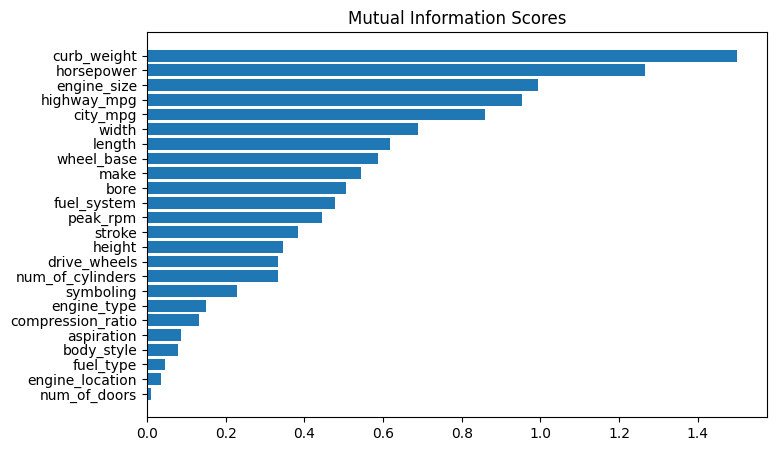

In [10]:
def plot_mi_scores(scores):
    
    scores = scores.sort_values(ascending=True)
    
    width = np.arange(len(scores))
    
    ticks = list(scores.index)
    
    plt.barh(width, scores)
    
    plt.yticks(width, ticks)
    
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))

plot_mi_scores(mi_scores)

La visualización de datos es un excelente paso posterior a una clasificación de utilidad. Veamos más de cerca un par de estas variables.

Como era de esperar, la característica con mayor puntuación, `curb_weight`, muestra una fuerte relación con `price`, la variable objetivo.


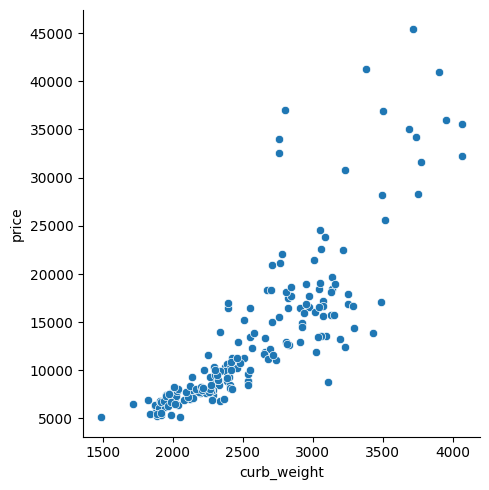

In [11]:
sns.relplot(x="curb_weight", y="price", data=df);

La característica `fuel_type` tiene una puntuación de información mutua (MI) bastante baja, pero como podemos ver en la figura, separa claramente dos poblaciones de precios con tendencias diferentes dentro de la característica `horsepower`.  

Esto indica que `fuel_type` aporta un **efecto de interacción** y que, después de todo, puede no ser una variable poco importante. Antes de decidir que una característica no es relevante basándose únicamente en su puntuación de MI, es recomendable investigar posibles efectos de interacción. En este punto, el conocimiento del dominio puede ofrecer una gran ayuda.


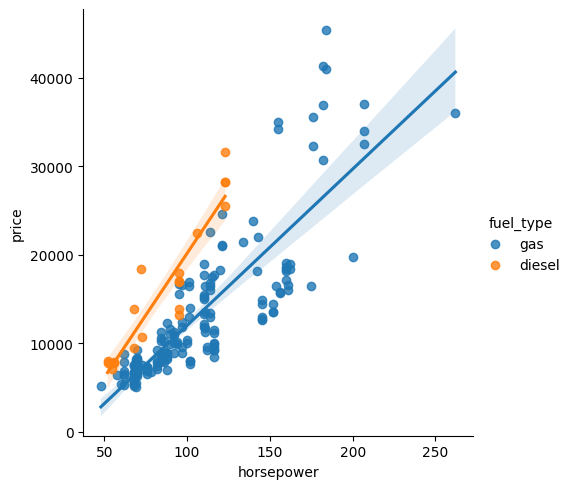

In [12]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df);